In [1]:
import pandas as pd
import pandas_datareader as pdr
from datetime import datetime

In [2]:
df_tesla = pdr.get_data_yahoo('TSLA')

In [3]:
df_tesla.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-03-25,1021.799988,997.320007,1008.000000,1010.640015,20642900.0,1010.640015
2022-03-28,1097.880005,1053.599976,1065.099976,1091.839966,34168700.0,1091.839966
2022-03-29,1114.770020,1073.109985,1107.989990,1099.569946,24538300.0,1099.569946
2022-03-30,1113.949951,1084.000000,1091.170044,1093.989990,19913800.0,1093.989990
2022-03-30,1113.880005,1084.000000,1091.170044,1093.989990,19955002.0,1093.989990


<AxesSubplot:xlabel='Date'>

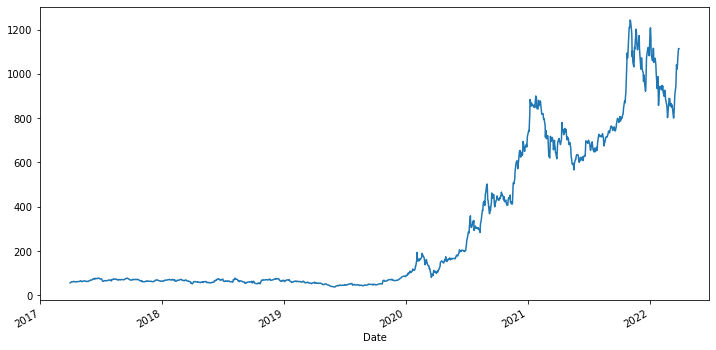

In [4]:
df_tesla['High'].plot(figsize=(12,6))

<AxesSubplot:xlabel='Date'>

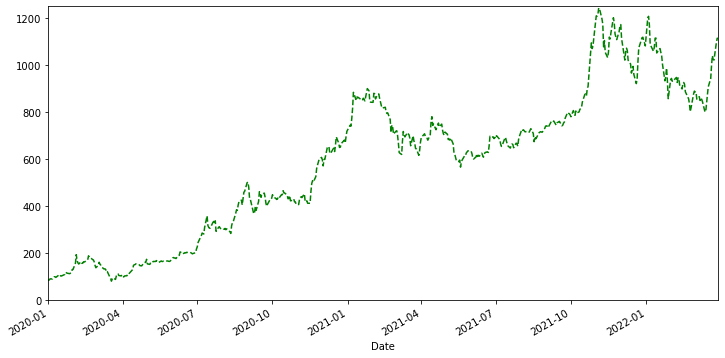

In [5]:
## xlimit and ylimit 
df_tesla['High'].plot(xlim=['2020-01-01','2022-03-30'],ylim=[0,1250],figsize=(12,6),ls='--',c='green')

### Taking values from dataset:

In [6]:
index = df_tesla.loc['2020-01-01':'2022-03-30'].index
tesla_open = df_tesla.loc['2020-01-01':'2022-03-30']['Open']

In [7]:
tesla_close = df_tesla.loc['2020-01-01':'2022-03-30']['Close']
tesla_high = df_tesla.loc['2020-01-01':'2022-03-30']['High']
tesla_low = df_tesla.loc['2020-01-01':'2022-03-30']['Low']
tesla_volume = df_tesla.loc['2020-01-01':'2022-03-30']['Volume']

### Ploting values:

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

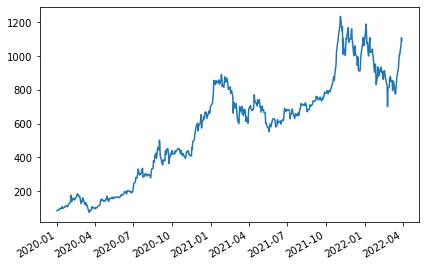

In [9]:
figure,axis = plt.subplots()
plt.tight_layout()
figure.autofmt_xdate() ### preventing overlapping
axis.plot(index,tesla_open)

### Datetime Index:

In [10]:
df_tesla = df_tesla.reset_index()

In [11]:
df_tesla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1260 entries, 0 to 1259
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1260 non-null   datetime64[ns]
 1   High       1260 non-null   float64       
 2   Low        1260 non-null   float64       
 3   Open       1260 non-null   float64       
 4   Close      1260 non-null   float64       
 5   Volume     1260 non-null   float64       
 6   Adj Close  1260 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 69.0 KB


In [12]:
# If we want to convert object into datetime 
pd.to_datetime(df_tesla['Date'])

0      2017-03-31
1      2017-04-03
2      2017-04-04
3      2017-04-05
4      2017-04-06
          ...    
1255   2022-03-25
1256   2022-03-28
1257   2022-03-29
1258   2022-03-30
1259   2022-03-30
Name: Date, Length: 1260, dtype: datetime64[ns]

In [13]:
### To agian use date as index use
df_tesla = df_tesla.set_index('Date',drop=True)
df_tesla.head(2)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-03-31,55.936001,55.264,55.745998,55.660000,16473000.0,55.660000
2017-04-03,59.799999,56.916,57.380001,59.703999,69443000.0,59.703999


In [14]:
## Datetime
datetime(2021,11,21)

datetime.datetime(2021, 11, 21, 0, 0)

In [15]:
date = datetime.now()
date

datetime.datetime(2022, 3, 31, 14, 17, 35, 530652)

In [16]:
date.date()

datetime.date(2022, 3, 31)

In [17]:
date.day

31

In [18]:
date.weekday()

3

In [19]:
date.year

2022

In [20]:
date.time()

datetime.time(14, 17, 35, 530652)

In [21]:
date.hour

14

In [22]:
date.minute

17

## Time resampling:

### 1) Year End Frequency:

In [23]:
df_tesla.resample(rule='A').min()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-12-31,55.936001,55.264000,55.745998,55.660000,15178500.0,55.660000
2018-12-31,52.066002,48.917999,50.556000,50.112000,15403500.0,50.112000
2019-12-31,37.335999,35.397999,36.220001,35.793999,12328000.0,35.793999
2020-12-31,80.972000,70.101997,74.940002,72.244003,17357700.0,72.244003
2021-12-31,566.210022,539.489990,552.549988,563.000000,9800600.0,563.000000
2022-12-31,800.700012,700.000000,700.390015,764.039978,16909700.0,764.039978


In [24]:
df_tesla.resample(rule='A').max()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-12-31,77.921997,75.870003,77.337997,77.000000,98957000.0,77.000000
2018-12-31,77.491997,73.424004,75.000000,75.914001,168248500.0,75.914001
2019-12-31,87.061996,85.269997,87.000000,86.188004,150030500.0,86.188004
2020-12-31,718.719971,691.119995,699.989990,705.669983,304694000.0,705.669983
2021-12-31,1243.489990,1217.000000,1234.410034,1229.910034,89396500.0,1229.910034
2022-12-31,1208.000000,1136.040039,1189.550049,1199.780029,50521900.0,1199.780029


<AxesSubplot:xlabel='Date'>

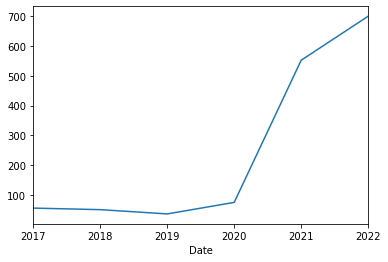

In [25]:
df_tesla.resample(rule='A').min()['Open'].plot()

### 2) Quarterly start Frequency:

In [26]:
df_tesla.resample(rule='QS').min().head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-01-01,55.936001,55.264000,55.745998,55.660000,16473000.0,55.660000
2017-04-01,59.799999,56.916000,57.380001,59.000000,15178500.0,59.000000
2017-07-01,63.400002,60.625999,62.580002,61.765999,15247500.0,61.765999
2017-10-01,60.891998,58.526001,59.900002,59.852001,16220500.0,59.852001
2018-01-01,53.736000,49.641998,51.298000,51.556000,16098000.0,51.556000


<AxesSubplot:xlabel='Date'>

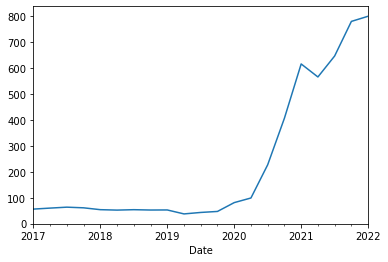

In [27]:
df_tesla.resample(rule='QS').min()['High'].plot()

### 3) Business Year end Freq:

In [28]:
df_tesla.resample(rule='BA').min().head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-12-29,55.936001,55.264000,55.745998,55.660000,15178500.0,55.660000
2018-12-31,52.066002,48.917999,50.556000,50.112000,15403500.0,50.112000
2019-12-31,37.335999,35.397999,36.220001,35.793999,12328000.0,35.793999
2020-12-31,80.972000,70.101997,74.940002,72.244003,17357700.0,72.244003
2021-12-31,566.210022,539.489990,552.549988,563.000000,9800600.0,563.000000


<AxesSubplot:xlabel='Date'>

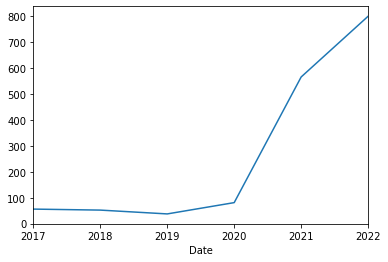

In [29]:
df_tesla.resample(rule='BA').min()['High'].plot()

### 4) Business Quarters End Freq:

In [30]:
df_tesla.resample(rule='BQS').min().head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-01-02,55.936001,55.264000,55.745998,55.660000,16473000.0,55.660000
2017-04-03,59.799999,56.916000,57.380001,59.000000,15178500.0,59.000000
2017-07-03,63.400002,60.625999,62.580002,61.765999,15247500.0,61.765999
2017-10-02,60.891998,58.526001,59.900002,59.852001,16220500.0,59.852001
2018-01-01,53.736000,49.641998,51.298000,51.556000,16098000.0,51.556000


<AxesSubplot:xlabel='Date'>

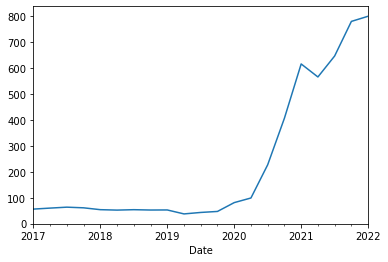

In [31]:
df_tesla.resample(rule='BQS').min()['High'].plot()

### Plotting 

<AxesSubplot:xlabel='Date'>

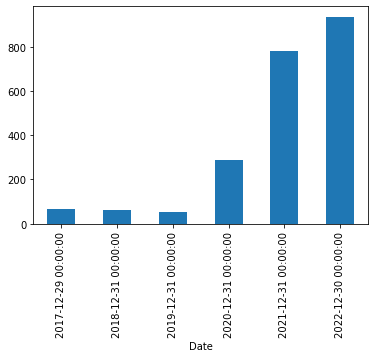

In [32]:
df_tesla['Open'].resample(rule='BA').mean().plot(kind='bar')

<AxesSubplot:xlabel='Date'>

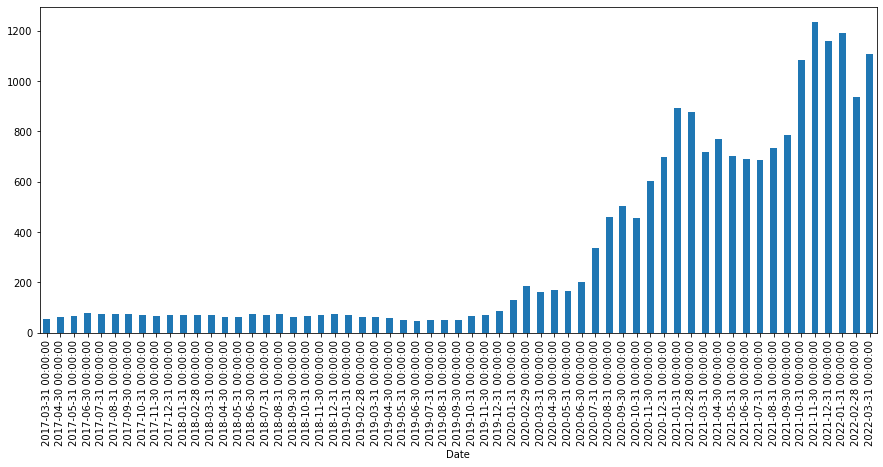

In [33]:
df_tesla['Open'].resample(rule='M').max().plot(kind='bar',figsize=(15,6))

## Mean Rolling and Expanding:

In [34]:
df_tesla['High'].head()

Date
2017-03-31    55.936001
2017-04-03    59.799999
2017-04-04    60.962002
2017-04-05    60.976002
2017-04-06    60.388000
Name: High, dtype: float64

In [35]:
df_tesla['High'].rolling(6).mean().head(15)

Date
2017-03-31          NaN
2017-04-03          NaN
2017-04-04          NaN
2017-04-05          NaN
2017-04-06          NaN
2017-04-07    59.766667
2017-04-10    60.901667
2017-04-11    61.384000
2017-04-12    61.505333
2017-04-13    61.588999
2017-04-17    61.657666
2017-04-18    61.595999
2017-04-19    61.359000
2017-04-20    61.215000
2017-04-21    61.146667
Name: High, dtype: float64

In [37]:
df_tesla['21 day rolling'] = df_tesla['High'].rolling(21).mean()

<AxesSubplot:xlabel='Date'>

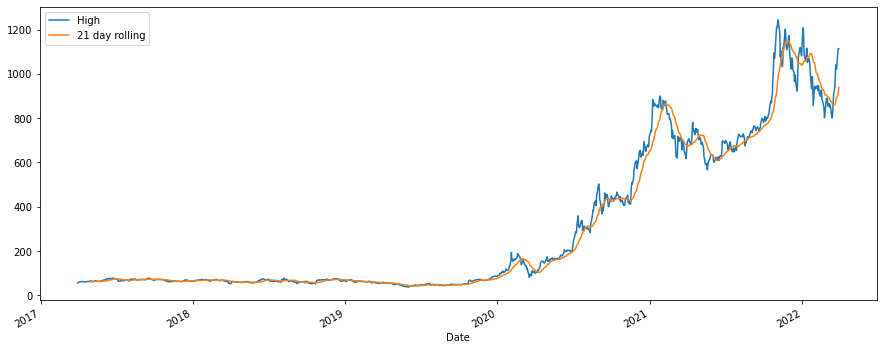

In [38]:
df_tesla[['High','21 day rolling']].plot(figsize=(15,6))

<AxesSubplot:xlabel='Date'>

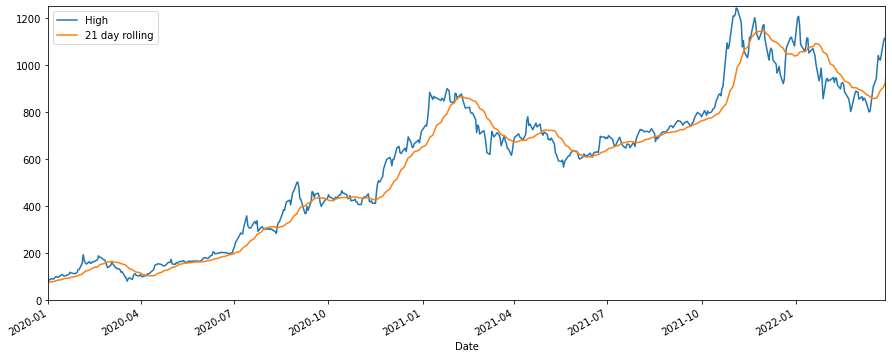

In [39]:
df_tesla[['High','21 day rolling']].plot(xlim=['2020-01-01','2022-3-30'],ylim=[0,1250],figsize=(15,6))